In [1]:
#importing things
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import *

## First calculate true mean from clustering dataset

In [2]:
#reading in data
gen0 = (pd.DataFrame(pd.read_csv('20200509_PCA_unfiltered_0_adj.csv', delimiter=','),columns=['principal component 1','principal component 2'])).rename(columns ={"principal component 1":"principle_component_1", "principal component 2":"principle_component_2"})
gen200 = (pd.DataFrame(pd.read_csv('20200509_PCA_unfiltered_200_adj.csv', delimiter=','),columns=['principal component 1','principal component 2'])).rename(columns ={"principal component 1":"principle_component_1", "principal component 2":"principle_component_2"})
gen400 = (pd.DataFrame(pd.read_csv('20200509_PCA_unfiltered_400_adj.csv', delimiter=','),columns=['principal component 1','principal component 2'])).rename(columns ={"principal component 1":"principle_component_1", "principal component 2":"principle_component_2"})
gen600 = (pd.DataFrame(pd.read_csv('20200509_PCA_unfiltered_600_adj.csv', delimiter=','),columns=['principal component 1','principal component 2'])).rename(columns ={"principal component 1":"principle_component_1", "principal component 2":"principle_component_2"})
gen800 = (pd.DataFrame(pd.read_csv('20200509_PCA_unfiltered_800_adj.csv', delimiter=','),columns=['principal component 1','principal component 2'])).rename(columns ={"principal component 1":"principle_component_1", "principal component 2":"principle_component_2"})
gen1000 = (pd.DataFrame(pd.read_csv('20200509_PCA_unfiltered_1000_adj.csv', delimiter=','),columns=['principal component 1','principal component 2'])).rename(columns ={"principal component 1":"principle_component_1", "principal component 2":"principle_component_2"})
cum = (pd.DataFrame(pd.read_csv('20200509_PCA_unfiltered_cum_adj.csv', delimiter=','),columns=['principal component 1','principal component 2'])).rename(columns ={"principal component 1":"principle_component_1", "principal component 2":"principle_component_2"})

#finding nearest neighbor indices
neigh=NearestNeighbors(n_neighbors=6) #6 neighbors is really 5, plus self, which we exclude later from analysis
#epoch0
neigh.fit(gen0)
gen0_neigh = (pd.DataFrame(neigh.kneighbors(gen0, return_distance=False),columns=["self","neigh1", "neigh2", "neigh3", "neigh4", "neigh5"])).reset_index(drop=True)
#epoch200
neigh.fit(gen200)
gen200_neigh = (pd.DataFrame(neigh.kneighbors(gen200, return_distance=False),columns=["self","neigh1", "neigh2", "neigh3", "neigh4", "neigh5"])).reset_index(drop=True)
#epoch400
neigh.fit(gen400)
gen400_neigh = (pd.DataFrame(neigh.kneighbors(gen400, return_distance=False),columns=["self","neigh1", "neigh2", "neigh3", "neigh4", "neigh5"])).reset_index(drop=True)
#epoch600
neigh.fit(gen600)
gen600_neigh = (pd.DataFrame(neigh.kneighbors(gen600, return_distance=False),columns=["self","neigh1", "neigh2", "neigh3", "neigh4", "neigh5"])).reset_index(drop=True)
#epoch800
neigh.fit(gen800)
gen800_neigh = (pd.DataFrame(neigh.kneighbors(gen800, return_distance=False),columns=["self","neigh1", "neigh2", "neigh3", "neigh4", "neigh5"])).reset_index(drop=True)
#epoch1000
neigh.fit(gen1000)
gen1000_neigh = (pd.DataFrame(neigh.kneighbors(gen1000, return_distance=False),columns=["self","neigh1", "neigh2", "neigh3", "neigh4", "neigh5"])).reset_index(drop=True)
#cumulative
neigh.fit(cum)
cum_neigh = (pd.DataFrame(neigh.kneighbors(cum, return_distance=False),columns=["self","neigh1", "neigh2", "neigh3", "neigh4", "neigh5"])).reset_index(drop=True)

#make new neighbors df, use dictionary and to replace neighbor index with evoEnvt
neighbors=['1','2','3','4','5']
#epoch0
gen0_df = pd.DataFrame()
gen0_dict = (pd.read_csv('20200509_PCA_unfiltered_0_adj.csv', delimiter=',')).to_dict('series')
gen0_df['self']=gen0_neigh['self'].replace(gen0_dict['evoEnvt-ploidy'])
for neighbor in neighbors:
    gen0_df['neigh%s' % neighbor]=gen0_neigh['neigh%s' % neighbor].replace(gen0_dict['evoEnvt-ploidy'])
# epoch200
gen200_df = pd.DataFrame()
gen200_dict = (pd.read_csv('20200509_PCA_unfiltered_200_adj.csv', delimiter=',')).to_dict('series')
gen200_df['self']=gen200_neigh['self'].replace(gen200_dict['evoEnvt-ploidy'])
for neighbor in neighbors:
    gen200_df['neigh%s' % neighbor]=gen200_neigh['neigh%s' % neighbor].replace(gen200_dict['evoEnvt-ploidy'])
# epoch400
gen400_df = pd.DataFrame()
gen400_dict = (pd.read_csv('20200509_PCA_unfiltered_400_adj.csv', delimiter=',')).to_dict('series')
gen400_df['self']=gen400_neigh['self'].replace(gen400_dict['evoEnvt-ploidy'])
for neighbor in neighbors:
    gen400_df['neigh%s' % neighbor]=gen400_neigh['neigh%s' % neighbor].replace(gen400_dict['evoEnvt-ploidy'])
# epoch600
gen600_df = pd.DataFrame()
gen600_dict = (pd.read_csv('20200509_PCA_unfiltered_600_adj.csv', delimiter=',')).to_dict('series')
gen600_df['self']=gen600_neigh['self'].replace(gen600_dict['evoEnvt-ploidy'])
for neighbor in neighbors:
    gen600_df['neigh%s' % neighbor]=gen600_neigh['neigh%s' % neighbor].replace(gen600_dict['evoEnvt-ploidy'])
# epoch800
gen800_df = pd.DataFrame()
gen800_dict = (pd.read_csv('20200509_PCA_unfiltered_800_adj.csv', delimiter=',')).to_dict('series')
gen800_df['self']=gen800_neigh['self'].replace(gen800_dict['evoEnvt-ploidy'])
for neighbor in neighbors:
    gen800_df['neigh%s' % neighbor]=gen800_neigh['neigh%s' % neighbor].replace(gen800_dict['evoEnvt-ploidy'])
# epoch1000
gen1000_df = pd.DataFrame()
gen1000_dict = (pd.read_csv('20200509_PCA_unfiltered_1000_adj.csv', delimiter=',')).to_dict('series')
gen1000_df['self']=gen1000_neigh['self'].replace(gen1000_dict['evoEnvt-ploidy'])
for neighbor in neighbors:
    gen1000_df['neigh%s' % neighbor]=gen1000_neigh['neigh%s' % neighbor].replace(gen1000_dict['evoEnvt-ploidy'])
# cum
cum_df = pd.DataFrame()
cum_dict = (pd.read_csv('20200509_PCA_unfiltered_cum_adj.csv', delimiter=',')).to_dict('series')
cum_df['self']=cum_neigh['self'].replace(cum_dict['evoEnvt-ploidy'])
for neighbor in neighbors:
    cum_df['neigh%s' % neighbor]=cum_neigh['neigh%s' % neighbor].replace(cum_dict['evoEnvt-ploidy'])

#counting how many neighboring nodes are from the same environment
def similarity(self,neigh):
    if self == neigh:
        return 1
    else:
        return 0

for neighbor in neighbors:
    gen0_df['match%s' % neighbor] = gen0_df.apply(lambda x: similarity(x['self'],x['neigh%s' % neighbor]),axis=1)
    gen200_df['match%s' % neighbor] = gen200_df.apply(lambda x: similarity(x['self'],x['neigh%s' % neighbor]),axis=1)
    gen400_df['match%s' % neighbor] = gen400_df.apply(lambda x: similarity(x['self'],x['neigh%s' % neighbor]),axis=1)
    gen600_df['match%s' % neighbor] = gen600_df.apply(lambda x: similarity(x['self'],x['neigh%s' % neighbor]),axis=1)
    gen800_df['match%s' % neighbor] = gen800_df.apply(lambda x: similarity(x['self'],x['neigh%s' % neighbor]),axis=1)
    gen1000_df['match%s' % neighbor] = gen1000_df.apply(lambda x: similarity(x['self'],x['neigh%s' % neighbor]),axis=1)
    cum_df['match%s' % neighbor] = cum_df.apply(lambda x: similarity(x['self'],x['neigh%s' % neighbor]),axis=1)
gen0_df['sum'] = gen0_df.sum(axis=1)
gen200_df['sum'] = gen200_df.sum(axis=1)
gen400_df['sum'] = gen400_df.sum(axis=1)
gen600_df['sum'] = gen600_df.sum(axis=1)
gen800_df['sum'] = gen800_df.sum(axis=1)
gen1000_df['sum'] = gen1000_df.sum(axis=1)
cum_df['sum'] = cum_df.sum(axis=1)

#merge dataframe with summed matches with PCs for plotting
gen0_plot = pd.concat([gen0,gen0_df],axis=1)
gen200_plot = pd.concat([gen200,gen200_df],axis=1)
gen400_plot = pd.concat([gen400,gen400_df],axis=1)
gen600_plot = pd.concat([gen600,gen600_df],axis=1)
gen800_plot = pd.concat([gen800,gen800_df],axis=1)
gen1000_plot = pd.concat([gen1000,gen1000_df],axis=1)
cum_plot = pd.concat([cum,cum_df],axis=1)

#average the summed matches by evolution condition
mean0=[]
mean200=[]
mean400=[]
mean600=[]
mean800=[]
mean1000=[]
meancum=[]
mean0.append(gen0_plot.groupby('self')['sum'].mean())
mean200.append(gen200_plot.groupby('self')['sum'].mean())
mean400.append(gen400_plot.groupby('self')['sum'].mean())
mean600.append(gen600_plot.groupby('self')['sum'].mean())
mean800.append(gen800_plot.groupby('self')['sum'].mean())
mean1000.append(gen1000_plot.groupby('self')['sum'].mean())
meancum.append(cum_plot.groupby('self')['sum'].mean())
#reformatting epoch data as x series
epoch = [0,200,400,600,800,1000]
epoch_array = np.array(epoch)
mean0_df=(pd.DataFrame(mean0)).rename(columns={"self":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
mean200_df=(pd.DataFrame(mean200)).rename(columns={"self":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
mean400_df=(pd.DataFrame(mean400)).rename(columns={"self":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
mean600_df=(pd.DataFrame(mean600)).rename(columns={"self":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
mean800_df=(pd.DataFrame(mean800)).rename(columns={"self":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
mean1000_df=(pd.DataFrame(mean1000)).rename(columns={"self":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
meancum_df=(pd.DataFrame(meancum)).rename(columns={"self":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})

true_means = pd.concat([mean0_df,mean200_df,mean400_df,mean600_df,mean800_df,mean1000_df],axis=0)
true_cum = pd.concat([meancum_df],axis=0)

In [ ]:
## functions to check clustering by plotting

In [3]:
# #checking that these are actually neighbors
# check = pd.concat([cum,cum_neigh],axis=1)
# ax = check.plot.scatter(x='principle_component_1', y='principle_component_2', c='b')
# for i, txt in enumerate(check.self):
#     ax.annotate(txt, (check.principle_component_1.iat[i],check.principle_component_2.iat[i]))
# plt.show()

In [4]:
# #color by number of matches to home envt
# neighplot0 = gen0_plot.plot.scatter(x='principle_component_1', y='principle_component_2', c='sum', colormap='viridis')
# neighplot200 = gen200_plot.plot.scatter(x='principle_component_1', y='principle_component_2', c='sum', colormap='viridis')
# neighplot400 = gen400_plot.plot.scatter(x='principle_component_1', y='principle_component_2', c='sum', colormap='viridis')
# neighplot600 = gen600_plot.plot.scatter(x='principle_component_1', y='principle_component_2', c='sum', colormap='viridis')
# neighplot800 = gen800_plot.plot.scatter(x='principle_component_1', y='principle_component_2', c='sum', colormap='viridis')
# neighplot1000 = gen1000_plot.plot.scatter(x='principle_component_1', y='principle_component_2', c='sum', colormap='viridis')
# neighplotcum = cum_plot.plot.scatter(x='principle_component_1', y='principle_component_2', c='sum', colormap='viridis')

In [5]:
# #color by number of matches to home envt
# numeric = {'YPD(37C)-H':1, 'YPD(37C)-D':2, 'YPD-D':3, 'YPD+AA-D':4}
# gen0_plot['numeric']=gen0_plot["self"].replace(numeric)
# gen200_plot['numeric']=gen200_plot["self"].replace(numeric)
# gen400_plot['numeric']=gen400_plot["self"].replace(numeric)
# gen600_plot['numeric']=gen600_plot["self"].replace(numeric)
# gen800_plot['numeric']=gen800_plot["self"].replace(numeric)
# gen1000_plot['numeric']=gen1000_plot["self"].replace(numeric)
# cum_plot['numeric']=cum_plot["self"].replace(numeric)
# neighplot0 = gen0_plot.plot.scatter(x='principle_component_1', y='principle_component_2', c='numeric', colormap='viridis')
# neighplot200 = gen200_plot.plot.scatter(x='principle_component_1', y='principle_component_2', c='numeric', colormap='viridis')
# neighplot400 = gen400_plot.plot.scatter(x='principle_component_1', y='principle_component_2', c='numeric', colormap='viridis')
# neighplot600 = gen600_plot.plot.scatter(x='principle_component_1', y='principle_component_2', c='numeric', colormap='viridis')
# neighplot800 = gen800_plot.plot.scatter(x='principle_component_1', y='principle_component_2', c='numeric', colormap='viridis')
# neighplot1000 = gen1000_plot.plot.scatter(x='principle_component_1', y='principle_component_2', c='numeric', colormap='viridis')
# neighplotcum = cum_plot.plot.scatter(x='principle_component_1', y='principle_component_2', c='numeric', colormap='viridis')

## bootstrapping to calculate 95% CI

In [3]:
#running through files
import os
bs_e0=[]
bs_e200=[]
bs_e400=[]
bs_e600=[]
bs_e800=[]
bs_e1000=[]
bs_cum=[]
count = 0
    
#for each bootstrapped PCA, calculate the clustering metric for each epoch/envt
directory = 'unfiltered_bootstrap_adj'
for filename in os.listdir(directory):
    for i in range(0,99):
        if filename.endswith("_0_adj.csv") and ("unfiltered_"+str(i)+"_") in filename:
            file = directory+filename
            print(filename)
            count = count + 1
            gen0bs = (pd.DataFrame(pd.read_csv('unfiltered_bootstrap_adj/'+filename, delimiter=','),columns=['principal component 1','principal component 2'])).rename(columns ={"principal component 1":"principle_component_1", "principal component 2":"principle_component_2"})
            neigh.fit(gen0bs)
            gen0_neighbs = (pd.DataFrame(neigh.kneighbors(gen0bs, return_distance=False),columns=["self","neigh1", "neigh2", "neigh3", "neigh4", "neigh5"])).reset_index(drop=True)
            gen0_dfbs = pd.DataFrame()
            gen0_dictbs = (pd.read_csv('unfiltered_bootstrap_adj/'+filename, delimiter=',')).to_dict('series')
            gen0_dfbs['self']=gen0_neighbs['self'].replace(gen0_dictbs['evoEnvt-ploidy'])
            for neighbor in neighbors:
                gen0_dfbs['neigh%s' % neighbor]=gen0_neighbs['neigh%s' % neighbor].replace(gen0_dictbs['evoEnvt-ploidy'])
                gen0_dfbs['match%s' % neighbor] = gen0_dfbs.apply(lambda x: similarity(x['self'],x['neigh%s' % neighbor]),axis=1)
            gen0_dfbs['sum'] = gen0_dfbs.sum(axis=1)
            gen0_plotbs = pd.concat([gen0bs,gen0_dfbs],axis=1)
            bs_e0.append(gen0_plotbs)
        if filename.endswith("_200_adj.csv") and ("unfiltered_"+str(i)+"_") in filename:
            file = directory+filename
            print(filename)
            gen200bs = (pd.DataFrame(pd.read_csv('unfiltered_bootstrap_adj/'+filename, delimiter=','),columns=['principal component 1','principal component 2'])).rename(columns ={"principal component 1":"principle_component_1", "principal component 2":"principle_component_2"})
            neigh.fit(gen200bs)
            gen200_neighbs = (pd.DataFrame(neigh.kneighbors(gen200bs, return_distance=False),columns=["self","neigh1", "neigh2", "neigh3", "neigh4", "neigh5"])).reset_index(drop=True)
            gen200_dfbs = pd.DataFrame()
            gen200_dictbs = (pd.read_csv('unfiltered_bootstrap_adj/'+filename, delimiter=',')).to_dict('series')
            gen200_dfbs['self']=gen200_neighbs['self'].replace(gen200_dictbs['evoEnvt-ploidy'])
            for neighbor in neighbors:
                gen200_dfbs['neigh%s' % neighbor]=gen200_neighbs['neigh%s' % neighbor].replace(gen200_dictbs['evoEnvt-ploidy'])
                gen200_dfbs['match%s' % neighbor] = gen200_dfbs.apply(lambda x: similarity(x['self'],x['neigh%s' % neighbor]),axis=1)
            gen200_dfbs['sum'] = gen200_dfbs.sum(axis=1)
            gen200_plotbs = pd.concat([gen200bs,gen200_dfbs],axis=1)
            bs_e200.append(gen200_plotbs)
        if filename.endswith("_400_adj.csv") and ("unfiltered_"+str(i)+"_") in filename:
            file = directory+filename
            print(filename)
            gen400bs = (pd.DataFrame(pd.read_csv('unfiltered_bootstrap_adj/'+filename, delimiter=','),columns=['principal component 1','principal component 2'])).rename(columns ={"principal component 1":"principle_component_1", "principal component 2":"principle_component_2"})
            neigh.fit(gen400bs)
            gen400_neighbs = (pd.DataFrame(neigh.kneighbors(gen400bs, return_distance=False),columns=["self","neigh1", "neigh2", "neigh3", "neigh4", "neigh5"])).reset_index(drop=True)
            gen400_dfbs = pd.DataFrame()
            gen400_dictbs = (pd.read_csv('unfiltered_bootstrap_adj/'+filename, delimiter=',')).to_dict('series')
            gen400_dfbs['self']=gen400_neighbs['self'].replace(gen400_dictbs['evoEnvt-ploidy'])
            for neighbor in neighbors:
                gen400_dfbs['neigh%s' % neighbor]=gen400_neighbs['neigh%s' % neighbor].replace(gen400_dictbs['evoEnvt-ploidy'])
                gen400_dfbs['match%s' % neighbor] = gen400_dfbs.apply(lambda x: similarity(x['self'],x['neigh%s' % neighbor]),axis=1)
            gen400_dfbs['sum'] = gen400_dfbs.sum(axis=1)
            gen400_plotbs = pd.concat([gen400bs,gen400_dfbs],axis=1)
            bs_e400.append(gen400_plotbs)
        if filename.endswith("_600_adj.csv") and ("unfiltered_"+str(i)+"_") in filename:
            file = directory+filename
            print(filename)
            gen600bs = (pd.DataFrame(pd.read_csv('unfiltered_bootstrap_adj/'+filename, delimiter=','),columns=['principal component 1','principal component 2'])).rename(columns ={"principal component 1":"principle_component_1", "principal component 2":"principle_component_2"})
            neigh.fit(gen600bs)
            gen600_neighbs = (pd.DataFrame(neigh.kneighbors(gen600bs, return_distance=False),columns=["self","neigh1", "neigh2", "neigh3", "neigh4", "neigh5"])).reset_index(drop=True)
            gen600_dfbs = pd.DataFrame()
            gen600_dictbs = (pd.read_csv('unfiltered_bootstrap_adj/'+filename, delimiter=',')).to_dict('series')
            gen600_dfbs['self']=gen600_neighbs['self'].replace(gen600_dictbs['evoEnvt-ploidy'])
            for neighbor in neighbors:
                gen600_dfbs['neigh%s' % neighbor]=gen600_neighbs['neigh%s' % neighbor].replace(gen600_dictbs['evoEnvt-ploidy'])
                gen600_dfbs['match%s' % neighbor] = gen600_dfbs.apply(lambda x: similarity(x['self'],x['neigh%s' % neighbor]),axis=1)
            gen600_dfbs['sum'] = gen600_dfbs.sum(axis=1)
            gen600_plotbs = pd.concat([gen600bs,gen600_dfbs],axis=1)
            bs_e600.append(gen600_plotbs)
        if filename.endswith("_800_adj.csv") and ("unfiltered_"+str(i)+"_") in filename:
            file = directory+filename
            print(filename)
            gen800bs = (pd.DataFrame(pd.read_csv('unfiltered_bootstrap_adj/'+filename, delimiter=','),columns=['principal component 1','principal component 2'])).rename(columns ={"principal component 1":"principle_component_1", "principal component 2":"principle_component_2"})
            neigh.fit(gen800bs)
            gen800_neighbs = (pd.DataFrame(neigh.kneighbors(gen800bs, return_distance=False),columns=["self","neigh1", "neigh2", "neigh3", "neigh4", "neigh5"])).reset_index(drop=True)
            gen800_dfbs = pd.DataFrame()
            gen800_dictbs = (pd.read_csv('unfiltered_bootstrap_adj/'+filename, delimiter=',')).to_dict('series')
            gen800_dfbs['self']=gen800_neighbs['self'].replace(gen800_dictbs['evoEnvt-ploidy'])
            for neighbor in neighbors:
                gen800_dfbs['neigh%s' % neighbor]=gen800_neighbs['neigh%s' % neighbor].replace(gen800_dictbs['evoEnvt-ploidy'])
                gen800_dfbs['match%s' % neighbor] = gen800_dfbs.apply(lambda x: similarity(x['self'],x['neigh%s' % neighbor]),axis=1)
            gen800_dfbs['sum'] = gen800_dfbs.sum(axis=1)
            gen800_plotbs = pd.concat([gen800bs,gen800_dfbs],axis=1)
            bs_e800.append(gen800_plotbs)
        if filename.endswith("_1000_adj.csv") and ("unfiltered_"+str(i)+"_") in filename:
            file = directory+filename
            print(filename)
            gen1000bs = (pd.DataFrame(pd.read_csv('unfiltered_bootstrap_adj/'+filename, delimiter=','),columns=['principal component 1','principal component 2'])).rename(columns ={"principal component 1":"principle_component_1", "principal component 2":"principle_component_2"})
            neigh.fit(gen1000bs)
            gen1000_neighbs = (pd.DataFrame(neigh.kneighbors(gen1000bs, return_distance=False),columns=["self","neigh1", "neigh2", "neigh3", "neigh4", "neigh5"])).reset_index(drop=True)
            gen1000_dfbs = pd.DataFrame()
            gen1000_dictbs = (pd.read_csv('unfiltered_bootstrap_adj/'+filename, delimiter=',')).to_dict('series')
            gen1000_dfbs['self']=gen1000_neighbs['self'].replace(gen1000_dictbs['evoEnvt-ploidy'])
            for neighbor in neighbors:
                gen1000_dfbs['neigh%s' % neighbor]=gen1000_neighbs['neigh%s' % neighbor].replace(gen1000_dictbs['evoEnvt-ploidy'])
                gen1000_dfbs['match%s' % neighbor] = gen1000_dfbs.apply(lambda x: similarity(x['self'],x['neigh%s' % neighbor]),axis=1)
            gen1000_dfbs['sum'] = gen1000_dfbs.sum(axis=1)
            gen1000_plotbs = pd.concat([gen1000bs,gen1000_dfbs],axis=1)
            bs_e1000.append(gen1000_plotbs)
print(count)
count_2=0
directory = 'unfiltered_bootstrap_cum'
for filename in os.listdir(directory):
    for i in range(0,99):
        if filename.endswith("_adj.csv") and ("unfiltered_"+str(i)+"_") in filename:
            file = directory+filename
            print(filename)
            count_2 = count_2 + 1
            cumbs = (pd.DataFrame(pd.read_csv('unfiltered_bootstrap_cum/'+filename, delimiter=','),columns=['principal component 1','principal component 2'])).rename(columns ={"principal component 1":"principle_component_1", "principal component 2":"principle_component_2"})
            neigh.fit(cumbs)
            cum_neighbs = (pd.DataFrame(neigh.kneighbors(cumbs, return_distance=False),columns=["self","neigh1", "neigh2", "neigh3", "neigh4", "neigh5"])).reset_index(drop=True)
            cum_dfbs = pd.DataFrame()
            cum_dictbs = (pd.read_csv('unfiltered_bootstrap_cum/'+filename, delimiter=',')).to_dict('series')
            cum_dfbs['self']=cum_neighbs['self'].replace(cum_dictbs['evoEnvt-ploidy'])
            for neighbor in neighbors:
                cum_dfbs['neigh%s' % neighbor]=cum_neighbs['neigh%s' % neighbor].replace(cum_dictbs['evoEnvt-ploidy'])
                cum_dfbs['match%s' % neighbor] = cum_dfbs.apply(lambda x: similarity(x['self'],x['neigh%s' % neighbor]),axis=1)
            cum_dfbs['sum'] = cum_dfbs.sum(axis=1)
            cum_plotbs = pd.concat([cumbs,cum_dfbs],axis=1)
            bs_cum.append(cum_plotbs)
print(count_2)
#calculate the mean and sem for each bootstrapped dataset by envt ploidy
bs_meana = []
bs_meanb = []
bs_meanc = []
bs_meand = []
bs_meane = []
bs_meanf = []
bs_meang = []
for i in range(0,99):
    bs_meana.append(bs_e0[i].groupby('self')['sum'].mean())
    bs_meanb.append(bs_e200[i].groupby('self')['sum'].mean())
    bs_meanc.append(bs_e400[i].groupby('self')['sum'].mean())
    bs_meand.append(bs_e600[i].groupby('self')['sum'].mean())
    bs_meane.append(bs_e800[i].groupby('self')['sum'].mean())
    bs_meanf.append(bs_e1000[i].groupby('self')['sum'].mean())
    bs_meang.append(bs_cum[i].groupby('self')['sum'].mean())
#calculate the overall mean by environment
bs_meana_df=pd.DataFrame(bs_meana)
bs_meanb_df=pd.DataFrame(bs_meanb)
bs_meanc_df=pd.DataFrame(bs_meanc)
bs_meand_df=pd.DataFrame(bs_meand)
bs_meane_df=pd.DataFrame(bs_meane)
bs_meanf_df=pd.DataFrame(bs_meanf)
bs_meang_df=pd.DataFrame(bs_meang)
#these dataframes are average clustering metrics for each bootstrapped PC for each env
#calculate 95% CI of bootstrapped data
from scipy.stats import sem, t
from scipy import mean
##merging datasets for plotting
epoch = [0,200,400,600,800,1000]
epoch_array = np.array(epoch)
epoch_df = pd.DataFrame(data=[epoch_array])
transposed = epoch_df.T
transposed=transposed.rename(columns={0:"epoch"})
#zero
bs_zero_mean = bs_meana_df.groupby(level=0).mean()
bs_zero_025 = bs_meana_df.groupby(level=0).quantile(0.025)
bs_zero_975 = bs_meana_df.groupby(level=0).quantile(0.975)
bs_zero_low = bs_zero_mean - bs_zero_025
bs_zero_hi = bs_zero_975 - bs_zero_mean
bs_zero_low=bs_zero_low.rename(columns={"evoEnvt-ploidy":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
bs_zero_hi=bs_zero_hi.rename(columns={"evoEnvt-ploidy":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
#200
bs_200_mean = bs_meanb_df.groupby(level=0).mean()
bs_200_025 = bs_meanb_df.groupby(level=0).quantile(0.025)
bs_200_975 = bs_meanb_df.groupby(level=0).quantile(0.975)
bs_200_low = bs_200_mean - bs_200_025
bs_200_hi = bs_200_975 - bs_200_mean
bs_200_low=bs_200_low.rename(columns={"evoEnvt-ploidy":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
bs_200_hi=bs_200_hi.rename(columns={"evoEnvt-ploidy":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
#400
bs_400_mean = bs_meanc_df.groupby(level=0).mean()
bs_400_025 = bs_meanc_df.groupby(level=0).quantile(0.025)
bs_400_975 = bs_meanc_df.groupby(level=0).quantile(0.975)
bs_400_low = bs_400_mean - bs_400_025
bs_400_hi = bs_400_975 - bs_400_mean
bs_400_low=bs_400_low.rename(columns={"evoEnvt-ploidy":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
bs_400_hi=bs_400_hi.rename(columns={"evoEnvt-ploidy":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
#600
bs_600_mean = bs_meand_df.groupby(level=0).mean()
bs_600_025 = bs_meand_df.groupby(level=0).quantile(0.025)
bs_600_975 = bs_meand_df.groupby(level=0).quantile(0.975)
bs_600_low = bs_600_mean - bs_600_025
bs_600_hi = bs_600_975 - bs_600_mean
bs_600_low=bs_600_low.rename(columns={"evoEnvt-ploidy":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
bs_600_hi=bs_600_hi.rename(columns={"evoEnvt-ploidy":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
#800
bs_800_mean = bs_meane_df.groupby(level=0).mean()
bs_800_025 = bs_meane_df.groupby(level=0).quantile(0.025)
bs_800_975 = bs_meane_df.groupby(level=0).quantile(0.975)
bs_800_low = bs_800_mean - bs_800_025
bs_800_hi = bs_800_975 - bs_800_mean
bs_800_low=bs_800_low.rename(columns={"evoEnvt-ploidy":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
bs_800_hi=bs_800_hi.rename(columns={"evoEnvt-ploidy":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
#1000
bs_1000_mean = bs_meanf_df.groupby(level=0).mean()
bs_1000_025 = bs_meanf_df.groupby(level=0).quantile(0.025)
bs_1000_975 = bs_meanf_df.groupby(level=0).quantile(0.975)
bs_1000_low = bs_1000_mean - bs_1000_025
bs_1000_hi = bs_1000_975 - bs_1000_mean
bs_1000_low=bs_1000_low.rename(columns={"evoEnvt-ploidy":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
bs_1000_hi=bs_1000_hi.rename(columns={"evoEnvt-ploidy":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
#cum
bs_cum_mean = bs_meang_df.groupby(level=0).mean()
bs_cum_025 = bs_meang_df.groupby(level=0).quantile(0.025)
bs_cum_975 = bs_meang_df.groupby(level=0).quantile(0.975)
bs_cum_low = bs_cum_mean - bs_cum_025
bs_cum_hi = bs_cum_975 - bs_cum_mean
bs_cum_low=bs_cum_low.rename(columns={"evoEnvt-ploidy":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
bs_cum_hi=bs_cum_hi.rename(columns={"evoEnvt-ploidy":"","YPD(37C)-D":"YPD37","YPD(37C)-H":"YPD37H","YPD+AA-D":"YPDAA","YPD-D":"YPD"})
bs_mean_all = pd.concat([bs_zero_mean,bs_200_mean,bs_400_mean,bs_600_mean,bs_800_mean,bs_1000_mean],axis=0)
bs_low_all = pd.concat([bs_zero_low,bs_200_low,bs_400_low,bs_600_low,bs_800_low,bs_1000_low],axis=0)
bs_high_all = pd.concat([bs_zero_hi,bs_200_hi,bs_400_hi,bs_600_hi,bs_800_hi,bs_1000_hi],axis=0)
bs_mean_cum = pd.concat([bs_cum_mean],axis=0)
bs_low_cum = pd.concat([bs_cum_low],axis=0)
bs_high_cum = pd.concat([bs_cum_hi],axis=0)
## put these arrays into a dataframe and save as csv for plotting with permuted data
true_means.to_csv('20210622_clustering_output/unfil_true_means.csv', index=False)
true_cum.to_csv('20210622_clustering_output/unfil_true_cum.csv', index=False)
bs_low_all.to_csv('20210622_clustering_output/unfil_bs_low_all.csv', index=False)
bs_high_all.to_csv('20210622_clustering_output/unfil_bs_high_all.csv', index=False)
bs_low_cum.to_csv('20210622_clustering_output/unfil_bs_low_cum.csv', index=False)
bs_high_cum.to_csv('20210622_clustering_output/unfil_bs_high_cum.csv', index=False)

20200509_PCA_unfiltered_73_800_adj.csv
20200509_PCA_unfiltered_12_0_adj.csv
20200509_PCA_unfiltered_10_400_adj.csv
20200509_PCA_unfiltered_68_0_adj.csv
20200509_PCA_unfiltered_70_200_adj.csv
20200509_PCA_unfiltered_60_400_adj.csv
20200509_PCA_unfiltered_14_600_adj.csv
20200509_PCA_unfiltered_6_200_adj.csv
20200509_PCA_unfiltered_1_1000_adj.csv
20200509_PCA_unfiltered_21_1000_adj.csv
20200509_PCA_unfiltered_74_1000_adj.csv
20200509_PCA_unfiltered_64_600_adj.csv
20200509_PCA_unfiltered_5_800_adj.csv
20200509_PCA_unfiltered_6_1000_adj.csv
20200509_PCA_unfiltered_26_1000_adj.csv
20200509_PCA_unfiltered_73_1000_adj.csv
20200509_PCA_unfiltered_42_200_adj.csv
20200509_PCA_unfiltered_31_800_adj.csv
20200509_PCA_unfiltered_85_600_adj.csv
20200509_PCA_unfiltered_78_600_adj.csv
20200509_PCA_unfiltered_52_400_adj.csv
20200509_PCA_unfiltered_94_0_adj.csv
20200509_PCA_unfiltered_32_200_adj.csv
20200509_PCA_unfiltered_41_800_adj.csv
20200509_PCA_unfiltered_22_400_adj.csv
20200509_PCA_unfiltered_27_0_

20200509_PCA_unfiltered_92_400_adj.csv
20200509_PCA_unfiltered_52_800_adj.csv
20200509_PCA_unfiltered_21_200_adj.csv
20200509_PCA_unfiltered_98_0_adj.csv
20200509_PCA_unfiltered_51_0_adj.csv
20200509_PCA_unfiltered_92_1000_adj.csv
20200509_PCA_unfiltered_38_1000_adj.csv
20200509_PCA_unfiltered_31_400_adj.csv
20200509_PCA_unfiltered_9_200_adj.csv
20200509_PCA_unfiltered_22_800_adj.csv
20200509_PCA_unfiltered_96_600_adj.csv
20200509_PCA_unfiltered_51_200_adj.csv
20200509_PCA_unfiltered_95_1000_adj.csv
20200509_PCA_unfiltered_41_400_adj.csv
20200509_PCA_unfiltered_87_0_adj.csv
20200509_PCA_unfiltered_98_800_adj.csv
20200509_PCA_unfiltered_65_800_adj.csv
20200509_PCA_unfiltered_4_600_adj.csv
20200509_PCA_unfiltered_16_200_adj.csv
20200509_PCA_unfiltered_76_400_adj.csv
20200509_PCA_unfiltered_34_0_adj.csv
20200509_PCA_unfiltered_15_800_adj.csv
20200509_PCA_unfiltered_66_200_adj.csv
20200509_PCA_unfiltered_0_400_adj.csv
20200509_PCA_unfiltered_48_1000_adj.csv
20200509_PCA_unfiltered_38_200_a

20200509_PCA_unfiltered_11_400_adj.csv
20200509_PCA_unfiltered_72_800_adj.csv
20200509_PCA_unfiltered_54_0_adj.csv
20200509_PCA_unfiltered_90_1000_adj.csv
20200509_PCA_unfiltered_89_0_adj.csv
20200509_PCA_unfiltered_40_0_adj.csv
20200509_PCA_unfiltered_98_600_adj.csv
20200509_PCA_unfiltered_4_800_adj.csv
20200509_PCA_unfiltered_65_600_adj.csv
20200509_PCA_unfiltered_15_600_adj.csv
20200509_PCA_unfiltered_7_200_adj.csv
20200509_PCA_unfiltered_30_1000_adj.csv
20200509_PCA_unfiltered_65_1000_adj.csv
20200509_PCA_unfiltered_7_800_adj.csv
20200509_PCA_unfiltered_66_600_adj.csv
20200509_PCA_unfiltered_30_0_adj.csv
20200509_PCA_unfiltered_37_1000_adj.csv
20200509_PCA_unfiltered_62_1000_adj.csv
20200509_PCA_unfiltered_4_200_adj.csv
20200509_PCA_unfiltered_16_600_adj.csv
20200509_PCA_unfiltered_83_0_adj.csv
20200509_PCA_unfiltered_97_0_adj.csv
20200509_PCA_unfiltered_72_200_adj.csv
20200509_PCA_unfiltered_62_400_adj.csv
20200509_PCA_unfiltered_48_600_adj.csv
20200509_PCA_unfiltered_71_800_adj.c

20200509_PCA_unfiltered_29_adj.csv
20200509_PCA_unfiltered_39_adj.csv
20200509_PCA_unfiltered_90_adj.csv
20200509_PCA_unfiltered_80_adj.csv
20200509_PCA_unfiltered_85_adj.csv
20200509_PCA_unfiltered_95_adj.csv
20200509_PCA_unfiltered_5_adj.csv
20200509_PCA_unfiltered_13_adj.csv
20200509_PCA_unfiltered_61_adj.csv
20200509_PCA_unfiltered_71_adj.csv
20200509_PCA_unfiltered_47_adj.csv
20200509_PCA_unfiltered_57_adj.csv
20200509_PCA_unfiltered_25_adj.csv
20200509_PCA_unfiltered_35_adj.csv
20200509_PCA_unfiltered_78_adj.csv
20200509_PCA_unfiltered_68_adj.csv
20200509_PCA_unfiltered_56_adj.csv
20200509_PCA_unfiltered_46_adj.csv
20200509_PCA_unfiltered_34_adj.csv
20200509_PCA_unfiltered_24_adj.csv
20200509_PCA_unfiltered_69_adj.csv
20200509_PCA_unfiltered_79_adj.csv
20200509_PCA_unfiltered_94_adj.csv
20200509_PCA_unfiltered_84_adj.csv
20200509_PCA_unfiltered_12_adj.csv
20200509_PCA_unfiltered_4_adj.csv
20200509_PCA_unfiltered_70_adj.csv
20200509_PCA_unfiltered_60_adj.csv
20200509_PCA_unfiltere

## calc and format for plotting

In [4]:
def ap_ttest(perm_array,true):
    count = 0
    for val in perm_array:
        if val > true:
            count = count+1
        else:
            continue
    return ((count/1000)*24)

In [5]:
filtering='unfil'
true_means = pd.DataFrame(pd.read_csv('20210622_clustering_output/%s_true_means.csv' % filtering,delimiter=','))
true_cum = pd.DataFrame(pd.read_csv('20210622_clustering_output/%s_true_cum.csv'% filtering,delimiter=','))
bs_low_all = pd.DataFrame(pd.read_csv('20210622_clustering_output/%s_bs_low_all.csv'% filtering,delimiter=','))
bs_high_all = pd.DataFrame(pd.read_csv('20210622_clustering_output/%s_bs_high_all.csv'% filtering,delimiter=','))
bs_low_cum = pd.DataFrame(pd.read_csv('20210622_clustering_output/%s_bs_low_cum.csv'% filtering,delimiter=','))
bs_high_cum = pd.DataFrame(pd.read_csv('20210622_clustering_output/%s_bs_high_cum.csv'% filtering,delimiter=','))
#reformat for plotting
#reformatting epoch data as x series
epoch = ["0","200","400","600","800","1000"]
cum = ["all"]
epoch_array = np.array(epoch)
cum_array = np.array(cum)
############################################ making arrays for plotting
#YPD_s30 data
true_YPD_mean = np.array(true_means.YPD)
bs_YPD_lo = np.array(bs_low_all.YPD)
bs_YPD_hi = np.array(bs_high_all.YPD)
bs_YPD_CI = [bs_YPD_lo,bs_YPD_hi]
#YPD_s37 data
true_YPD37_mean = np.array(true_means.YPD37)
bs_YPD37_lo = np.array(bs_low_all.YPD37)
bs_YPD37_hi = np.array(bs_high_all.YPD37)
bs_YPD37_CI = [bs_YPD37_lo,bs_YPD37_hi]
#YPD_s37H data
true_YPD37H_mean = np.array(true_means.YPD37H)
bs_YPD37H_lo = np.array(bs_low_all.YPD37H)
bs_YPD37H_hi = np.array(bs_high_all.YPD37H)
bs_YPD37H_CI = [bs_YPD37H_lo,bs_YPD37H_hi]
#YPD_sAA data
true_YPDAA_mean = np.array(true_means.YPDAA)
bs_YPDAA_lo = np.array(bs_low_all.YPDAA)
bs_YPDAA_hi = np.array(bs_high_all.YPDAA)
bs_YPDAA_CI = [bs_YPDAA_lo,bs_YPDAA_hi]
########################################same for cume data
#YPD_s30 data
true_YPD_cum = np.array(true_cum.YPD)
bs_YPD_lo_c = np.array(bs_low_cum.YPD)
bs_YPD_hi_c = np.array(bs_high_cum.YPD)
bs_YPD_CI_c = [bs_YPD_lo_c,bs_YPD_hi_c]
#YPD_s37 data
true_YPD37_cum = np.array(true_cum.YPD37)
bs_YPD37_lo_c = np.array(bs_low_cum.YPD37)
bs_YPD37_hi_c = np.array(bs_high_cum.YPD37)
bs_YPD37_CI_c = [bs_YPD37_lo_c,bs_YPD37_hi_c]
#YPD_s37H data
true_YPD37H_cum = np.array(true_cum.YPD37H)
bs_YPD37H_lo_c = np.array(bs_low_cum.YPD37H)
bs_YPD37H_hi_c = np.array(bs_high_cum.YPD37H)
bs_YPD37H_CI_c = [bs_YPD37H_lo_c,bs_YPD37H_hi_c]
#YPD_sAA data
true_YPDAA_cum = np.array(true_cum.YPDAA)
bs_YPDAA_lo_c = np.array(bs_low_cum.YPDAA)
bs_YPDAA_hi_c = np.array(bs_high_cum.YPDAA)
bs_YPDAA_CI_c = [bs_YPDAA_lo_c,bs_YPDAA_hi_c]

In [6]:
#importing permuted data for plotting
df1 = pd.DataFrame(pd.read_csv('20210416_permute_1k_unfil.csv', delimiter=','))
df2 = pd.DataFrame(pd.read_csv('20210416_permute_1k_cum_unfil.csv', delimiter=','))
df2['gen']='x'
#formatting into arrays for t-test
import scipy.stats as st
from scipy.stats import ttest_ind_from_stats
#37
g0_37 = np.array(df1[df1['gen']==0]['YPD37'])
g0_37_p = ap_ttest(g0_37,true_YPD37_mean[0])
g200_37 = np.array(df1[df1['gen']==200]['YPD37'])
g200_37_p = ap_ttest(g200_37,true_YPD37_mean[1])
g400_37 = np.array(df1[df1['gen']==400]['YPD37'])
g400_37_p = ap_ttest(g400_37,true_YPD37_mean[2])
g600_37 = np.array(df1[df1['gen']==600]['YPD37'])
g600_37_p = ap_ttest(g600_37,true_YPD37_mean[3])
g800_37 = np.array(df1[df1['gen']==800]['YPD37'])
g800_37_p = ap_ttest(g800_37,true_YPD37_mean[4])
g1000_37 = np.array(df1[df1['gen']==1000]['YPD37'])
g1000_37_p = ap_ttest(g1000_37,true_YPD37_mean[5])
cum_37 = np.array(df2['YPD37'])
cum_37_p = ap_ttest(cum_37,true_YPD37_cum[0])
#hap
g0_37h = np.array(df1[df1['gen']==0]['YPD37H'])
g0_37h_p = ap_ttest(g0_37h,true_YPD37H_mean[0])
g200_37h = np.array(df1[df1['gen']==200]['YPD37H'])
g200_37h_p = ap_ttest(g200_37h,true_YPD37H_mean[1])
g400_37h = np.array(df1[df1['gen']==400]['YPD37H'])
g400_37h_p = ap_ttest(g400_37h,true_YPD37H_mean[2])
g600_37h = np.array(df1[df1['gen']==600]['YPD37H'])
g600_37h_p = ap_ttest(g600_37h,true_YPD37H_mean[3])
g800_37h = np.array(df1[df1['gen']==800]['YPD37H'])
g800_37h_p = ap_ttest(g800_37h,true_YPD37H_mean[4])
g1000_37h = np.array(df1[df1['gen']==1000]['YPD37H'])
g1000_37h_p = ap_ttest(g1000_37h,true_YPD37H_mean[5])
cum_37h = np.array(df2['YPD37H'])
cum_37h_p = ap_ttest(cum_37h,true_YPD37H_cum[0])
#AA
g0_AA = np.array(df1[df1['gen']==0]['YPDAA'])
g0_AA_p = ap_ttest(g0_AA,true_YPDAA_mean[0])
g200_AA = np.array(df1[df1['gen']==200]['YPDAA'])
g200_AA_p = ap_ttest(g200_AA,true_YPDAA_mean[1])
g400_AA = np.array(df1[df1['gen']==400]['YPDAA'])
g400_AA_p = ap_ttest(g400_AA,true_YPDAA_mean[2])
g600_AA = np.array(df1[df1['gen']==600]['YPDAA'])
g600_AA_p = ap_ttest(g600_AA,true_YPDAA_mean[3])
g800_AA = np.array(df1[df1['gen']==800]['YPDAA'])
g800_AA_p = ap_ttest(g800_AA,true_YPDAA_mean[4])
g1000_AA = np.array(df1[df1['gen']==1000]['YPDAA'])
g1000_AA_p = ap_ttest(g1000_AA,true_YPDAA_mean[5])
cum_AA = np.array(df2['YPDAA'])
cum_AA_p = ap_ttest(cum_AA,true_YPDAA_cum[0])
#30
g0_30 = np.array(df1[df1['gen']==0]['YPD'])
g0_30_p = ap_ttest(g0_30,true_YPD_mean[0])
g200_30 = np.array(df1[df1['gen']==200]['YPD'])
g200_30_p = ap_ttest(g200_30,true_YPD_mean[1])
g400_30 = np.array(df1[df1['gen']==400]['YPD'])
g400_30_p = ap_ttest(g400_30,true_YPD_mean[2])
g600_30 = np.array(df1[df1['gen']==600]['YPD'])
g600_30_p = ap_ttest(g600_30,true_YPD_mean[3])
g800_30 = np.array(df1[df1['gen']==800]['YPD'])
g800_30_p = ap_ttest(g800_30,true_YPD_mean[4])
g1000_30 = np.array(df1[df1['gen']==1000]['YPD'])
g1000_30_p = ap_ttest(g1000_30,true_YPD_mean[5])
cum_30 = np.array(df2['YPD37H'])
cum_30_p = ap_ttest(cum_30,true_YPD_cum[0])

##taking average and mean for plotting
p_true_means = df1.groupby('gen').mean()
perm_025 = df1.groupby('gen').quantile(0.025)
perm_975 = df1.groupby('gen').quantile(0.975)
p_bs_low_all = p_true_means - perm_025
p_bs_high_all = perm_975 - p_true_means
p_true_cum = df2.groupby('gen').mean()
cum_025 = df2.groupby('gen').quantile(0.025)
cum_975 = df2.groupby('gen').quantile(0.975)
p_bs_low_cum = p_true_cum - cum_025
p_bs_high_cum = cum_975 - p_true_cum

pval_dict = {'YPD':(g0_30_p,g200_30_p,g400_30_p,g600_30_p,g800_30_p,g1000_30_p,cum_30_p),'YPDAA':(g0_AA_p,g200_AA_p,g400_AA_p,g600_AA_p,g800_AA_p,g1000_AA_p,cum_AA_p),'YPD37H':(g0_37h_p,g200_37h_p,g400_37h_p,g600_37h_p,g800_37h_p,g1000_37h_p,cum_37h_p),'YPD37':(g0_37_p,g200_37_p,g400_37_p,g600_37_p,g800_37_p,g1000_37_p,cum_37_p)}
pval_df = pd.DataFrame(pval_dict)
pval_df

,YPD,YPDAA,YPD37H,YPD37
0,10.92,11.592,0.072,18.432
1,0.00,0.000,0.000,0.000
2,0.00,0.000,0.000,0.000
3,0.00,0.000,0.000,0.000
4,0.00,0.000,0.000,0.000
5,0.00,0.000,0.000,0.000
6,0.00,0.000,0.000,0.000


In [7]:
#reformat for plotting
#reformatting epoch data as x series
epoch = ["0","200","400","600","800","1000"]
cum = ["all"]
epoch_array = np.array(epoch)
cum_array = np.array(cum)
############################################ making arrays for plotting
#YPD_s30 data
true_YPD_mean = np.array(true_means.YPD)
bs_YPD_lo = np.array(bs_low_all.YPD)
bs_YPD_hi = np.array(bs_high_all.YPD)
bs_YPD_CI = [bs_YPD_lo,bs_YPD_hi]
#YPD_s37 data
true_YPD37_mean = np.array(true_means.YPD37)
bs_YPD37_lo = np.array(bs_low_all.YPD37)
bs_YPD37_hi = np.array(bs_high_all.YPD37)
bs_YPD37_CI = [bs_YPD37_lo,bs_YPD37_hi]
#YPD_s37H data
true_YPD37H_mean = np.array(true_means.YPD37H)
bs_YPD37H_lo = np.array(bs_low_all.YPD37H)
bs_YPD37H_hi = np.array(bs_high_all.YPD37H)
bs_YPD37H_CI = [bs_YPD37H_lo,bs_YPD37H_hi]
#YPD_sAA data
true_YPDAA_mean = np.array(true_means.YPDAA)
bs_YPDAA_lo = np.array(bs_low_all.YPDAA)
bs_YPDAA_hi = np.array(bs_high_all.YPDAA)
bs_YPDAA_CI = [bs_YPDAA_lo,bs_YPDAA_hi]
########################################same for cume data
#YPD_s30 data
true_YPD_cum = np.array(true_cum.YPD)
bs_YPD_lo_c = np.array(bs_low_cum.YPD)
bs_YPD_hi_c = np.array(bs_high_cum.YPD)
bs_YPD_CI_c = [bs_YPD_lo_c,bs_YPD_hi_c]
#YPD_s37 data
true_YPD37_cum = np.array(true_cum.YPD37)
bs_YPD37_lo_c = np.array(bs_low_cum.YPD37)
bs_YPD37_hi_c = np.array(bs_high_cum.YPD37)
bs_YPD37_CI_c = [bs_YPD37_lo_c,bs_YPD37_hi_c]
#YPD_s37H data
true_YPD37H_cum = np.array(true_cum.YPD37H)
bs_YPD37H_lo_c = np.array(bs_low_cum.YPD37H)
bs_YPD37H_hi_c = np.array(bs_high_cum.YPD37H)
bs_YPD37H_CI_c = [bs_YPD37H_lo_c,bs_YPD37H_hi_c]
#YPD_sAA data
true_YPDAA_cum = np.array(true_cum.YPDAA)
bs_YPDAA_lo_c = np.array(bs_low_cum.YPDAA)
bs_YPDAA_hi_c = np.array(bs_high_cum.YPDAA)
bs_YPDAA_CI_c = [bs_YPDAA_lo_c,bs_YPDAA_hi_c]

In [8]:
########permuted data
#YPD_s30 data
p_true_YPD_mean = np.array(p_true_means.YPD)
p_bs_YPD_lo = np.array(p_bs_low_all.YPD)
p_bs_YPD_hi = np.array(p_bs_high_all.YPD)
p_bs_YPD_CI = [p_bs_YPD_lo,p_bs_YPD_hi]
#YPD_s37 data
p_true_YPD37_mean = np.array(p_true_means.YPD37)
p_bs_YPD37_lo = np.array(p_bs_low_all.YPD37)
p_bs_YPD37_hi = np.array(p_bs_high_all.YPD37)
p_bs_YPD37_CI = [p_bs_YPD37_lo,p_bs_YPD37_hi]
#YPD_s37H data
p_true_YPD37H_mean = np.array(p_true_means.YPD37H)
p_bs_YPD37H_lo = np.array(p_bs_low_all.YPD37H)
p_bs_YPD37H_hi = np.array(p_bs_high_all.YPD37H)
p_bs_YPD37H_CI = [p_bs_YPD37H_lo,p_bs_YPD37H_hi]
#YPD_sAA data
p_true_YPDAA_mean = np.array(p_true_means.YPDAA)
p_bs_YPDAA_lo = np.array(p_bs_low_all.YPDAA)
p_bs_YPDAA_hi = np.array(p_bs_high_all.YPDAA)
p_bs_YPDAA_CI = [p_bs_YPDAA_lo,p_bs_YPDAA_hi]
########################################same for cume data
#YPD_s30 data
p_true_YPD_cum = np.array(p_true_cum.YPD)
p_bs_YPD_lo_c = np.array(p_bs_low_cum.YPD)
p_bs_YPD_hi_c = np.array(p_bs_high_cum.YPD)
p_bs_YPD_CI_c = [p_bs_YPD_lo_c,p_bs_YPD_hi_c]
#YPD_s37 data
p_true_YPD37_cum = np.array(p_true_cum.YPD37)
p_bs_YPD37_lo_c = np.array(p_bs_low_cum.YPD37)
p_bs_YPD37_hi_c = np.array(p_bs_high_cum.YPD37)
p_bs_YPD37_CI_c = [p_bs_YPD37_lo_c,p_bs_YPD37_hi_c]
#YPD_s37H data
p_true_YPD37H_cum = np.array(p_true_cum.YPD37H)
p_bs_YPD37H_lo_c = np.array(p_bs_low_cum.YPD37H)
p_bs_YPD37H_hi_c = np.array(p_bs_high_cum.YPD37H)
p_bs_YPD37H_CI_c = [p_bs_YPD37H_lo_c,p_bs_YPD37H_hi_c]
#YPD_sAA data
p_true_YPDAA_cum = np.array(p_true_cum.YPDAA)
p_bs_YPDAA_lo_c = np.array(p_bs_low_cum.YPDAA)
p_bs_YPDAA_hi_c = np.array(p_bs_high_cum.YPDAA)
p_bs_YPDAA_CI_c = [p_bs_YPDAA_lo_c,p_bs_YPDAA_hi_c]

## plotting

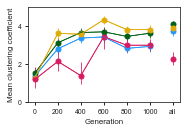

In [9]:
#setting up plot layout
sns.set_style("ticks")
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
matplotlib.rcParams['font.family'] = "sans-serif"
colors=['#2497FD','#025F17','#E1AB06','#D81B60']
#plotting
fig,ax1 = plt.subplots(figsize=(2.72,1.75))
#YPD
ax1.plot(epoch_array,true_YPD_mean, linewidth=0.8, marker='o',markersize=5,color=colors[0],label="YPD")
ax1.errorbar(epoch_array,true_YPD_mean, linewidth=0.8, yerr=bs_YPD_CI, color=colors[0], label=None)
#YPD cumulative
ax1.plot(cum_array, true_YPD_cum, marker='o', markersize=5,color=colors[0])
ax1.errorbar(cum_array, true_YPD_cum, linewidth=0.8, yerr=bs_YPD_CI_c, color=colors[0], label=None)
#YPD AA
ax1.plot(epoch_array,true_YPDAA_mean, linewidth=0.8, marker='o',markersize=5,color=colors[1],label="YPD + Acetic acid")
ax1.errorbar(epoch_array,true_YPDAA_mean, linewidth=0.8, yerr=bs_YPDAA_CI, color=colors[1], label=None)
#YPD AA  cumulative
ax1.plot(cum_array, true_YPDAA_cum, marker='o', markersize=5,color=colors[1])
ax1.errorbar(cum_array, true_YPDAA_cum, linewidth=0.8, yerr=bs_YPDAA_CI_c, color=colors[1], label=None)
#YPD 37
ax1.plot(epoch_array,true_YPD37_mean, linewidth=0.8, marker='o',markersize=5,color=colors[2],label="YPD, 37˚C (Dip.)")
ax1.errorbar(epoch_array,true_YPD37_mean, linewidth=0.8, yerr=bs_YPD37_CI, color=colors[2], label=None)
#YPD 37 cumulative
ax1.plot(cum_array, true_YPD37_cum, marker='o', markersize=5,color=colors[2])
ax1.errorbar(cum_array, true_YPD37_cum, linewidth=0.8, yerr=bs_YPD37_CI_c, color=colors[2], label=None)
#YPD HAP
ax1.plot(epoch_array,true_YPD37H_mean, linewidth=0.8, marker='o',markersize=5,color=colors[3],label="YPD, 37˚C (Hap.)")
ax1.errorbar(epoch_array,true_YPD37H_mean, linewidth=0.8, yerr=bs_YPD37H_CI, color=colors[3], label=None)
#YPD HAP cumulative
ax1.plot(cum_array, true_YPD37H_cum, marker='o', markersize=5,color=colors[3])
ax1.errorbar(cum_array, true_YPD37H_cum, linewidth=0.8, yerr=bs_YPD37H_CI_c, color=colors[3], label=None)

# uncomment to plot permuted data too
# #YPD
# ax1.plot(epoch_array,p_true_YPD_mean, linewidth=0.8, marker='^',markersize=5,color=colors[0],linestyle='--',dashes=(4, 2),label="YPD")
# ax1.errorbar(epoch_array,p_true_YPD_mean, linewidth=0.8, yerr=p_bs_YPD_CI, color=colors[0], label=None,linestyle='')
# #YPD cumulative
# ax1.plot(cum_array, p_true_YPD_cum, marker='^', markersize=5,color=colors[0])
# ax1.errorbar(cum_array, p_true_YPD_cum, linewidth=0.8, yerr=p_bs_YPD_CI_c, color=colors[0], label=None,linestyle='')
# #YPD AA
# ax1.plot(epoch_array,p_true_YPDAA_mean, marker='^',linewidth=0.8, markersize=5,color=colors[1],linestyle='--',dashes=(4, 2),label="YPD + Acetic acid")
# ax1.errorbar(epoch_array,p_true_YPDAA_mean, linewidth=0.8, yerr=p_bs_YPDAA_CI, color=colors[1], label=None,linestyle='')
# #YPD AA  cumulative
# ax1.plot(cum_array, p_true_YPDAA_cum, marker='^', markersize=5,color=colors[1])
# ax1.errorbar(cum_array, p_true_YPDAA_cum, linewidth=0.8, yerr=p_bs_YPDAA_CI_c, color=colors[1], label=None,linestyle='')
# #YPD 37
# ax1.plot(epoch_array,p_true_YPD37_mean, marker='^',linewidth=0.8, markersize=5,color=colors[2],linestyle='--',dashes=(4, 2),label="YPD, 37˚C (Dip.)")
# ax1.errorbar(epoch_array,p_true_YPD37_mean, linewidth=0.8, yerr=p_bs_YPD37_CI, color=colors[2], label=None,linestyle='')
# #YPD 37 cumulative
# ax1.plot(cum_array, p_true_YPD37_cum, marker='^', markersize=5,color=colors[2])
# ax1.errorbar(cum_array, p_true_YPD37_cum, linewidth=0.8, yerr=p_bs_YPD37_CI_c, color=colors[2], label=None,linestyle='')
# #YPD HAP
# ax1.plot(epoch_array,p_true_YPD37H_mean, marker='^',linewidth=0.8, markersize=5,color=colors[3],linestyle='--', dashes=(4, 2),label="YPD, 37˚C (Hap.)")
# ax1.errorbar(epoch_array,p_true_YPD37H_mean, linewidth=0.8, yerr=p_bs_YPD37H_CI, color=colors[3], label=None,linestyle='')
# #YPD HAP cumulative
# ax1.plot(cum_array, p_true_YPD37H_cum, marker='^', markersize=5,color=colors[3])
# ax1.errorbar(cum_array, p_true_YPD37H_cum, linewidth=0.8, yerr=p_bs_YPD37H_CI_c, color=colors[3], label=None,linestyle='')

#plt.title('PCA clustering over time', fontweight='bold', fontsize=8)
plt.ylabel("Mean clustering coefficient", fontsize=8)
plt.xlabel("Generation", fontsize=8)
#plt.legend(fontsize=7,loc='lower right',title="Evolution condition:",title_fontsize=7)
plt.tick_params(direction='out', length=3, width=1)
plt.setp(ax1.get_xticklabels(), fontsize=7)
plt.setp(ax1.get_yticklabels(), fontsize=7)
plt.ylim((0,5))
plt.plot()
plt.savefig('20210622_PCAcluster_unfil_CI_adj_noperm.png',bbox_inches = 'tight', dpi = 4000)


